In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
ue_data = pd.read_csv("unemployment_data.csv")

In [5]:
ue_data.head(5)

,FIPS Code,State and area,Year,Month,Rate
0,1,Alabama,1976,1,6.7
1,2,Alaska,1976,1,7.1
2,4,Arizona,1976,1,10.3
3,5,Arkansas,1976,1,7.4
4,6,California,1976,1,9.1


In [6]:
ue_data["Month"]

0         1
1         1
2         1
3         1
4         1
         ..
28509    10
28510    10
28511    10
28512    10
28513    10
Name: Month, Length: 28514, dtype: int64

In [7]:
ue_data.loc[0]

FIPS Code               1
State and area    Alabama
Year                 1976
Month                   1
Rate                  6.7
Name: 0, dtype: object

In [8]:
ue_data.loc[0]["State and area"]

'Alabama'

In [9]:
ue_data.loc[50]["State and area"]

'West Virginia'

In [13]:
ue_data.loc[53]["State and area"]

'Alabama'

In [14]:
ue_data.loc[106]["State and area"]

'Alabama'

In [18]:
28513/53

537.9811320754717

In [21]:
28512/54

528.0

In [23]:
test_date = str(str(ue_data.loc[0]["Year"]) + "-" + str(ue_data.loc[0]["Month"]))
test_date

'1976-1'

In [30]:
date_list = []
for i in range(0, 28514):
    if (i % 53 == 0):
        date_list.append(str(str(ue_data.loc[i]["Year"]) + "-" + str(ue_data.loc[i]["Month"])))
date_list

['1976-1',
 '1976-2',
 '1976-3',
 '1976-4',
 '1976-5',
 '1976-6',
 '1976-7',
 '1976-8',
 '1976-9',
 '1976-10',
 '1976-11',
 '1976-12',
 '1977-1',
 '1977-2',
 '1977-3',
 '1977-4',
 '1977-5',
 '1977-6',
 '1977-7',
 '1977-8',
 '1977-9',
 '1977-10',
 '1977-11',
 '1977-12',
 '1978-1',
 '1978-2',
 '1978-3',
 '1978-4',
 '1978-5',
 '1978-6',
 '1978-7',
 '1978-8',
 '1978-9',
 '1978-10',
 '1978-11',
 '1978-12',
 '1979-1',
 '1979-2',
 '1979-3',
 '1979-4',
 '1979-5',
 '1979-6',
 '1979-7',
 '1979-8',
 '1979-9',
 '1979-10',
 '1979-11',
 '1979-12',
 '1980-1',
 '1980-2',
 '1980-3',
 '1980-4',
 '1980-5',
 '1980-6',
 '1980-7',
 '1980-8',
 '1980-9',
 '1980-10',
 '1980-11',
 '1980-12',
 '1981-1',
 '1981-2',
 '1981-3',
 '1981-4',
 '1981-5',
 '1981-6',
 '1981-7',
 '1981-8',
 '1981-9',
 '1981-10',
 '1981-11',
 '1981-12',
 '1982-1',
 '1982-2',
 '1982-3',
 '1982-4',
 '1982-5',
 '1982-6',
 '1982-7',
 '1982-8',
 '1982-9',
 '1982-10',
 '1982-11',
 '1982-12',
 '1983-1',
 '1983-2',
 '1983-3',
 '1983-4',
 '1983-5',


In [31]:
alabama_rate = []
for i in range(0, 28514):
    if (ue_data.loc[i]["State and area"] == "Alabama"):
        alabama_rate.append(ue_data.loc[i]["Rate"])
alabama_rate

[6.7,
 6.7,
 6.6,
 6.5,
 6.4,
 6.5,
 6.6,
 6.8,
 6.9,
 7.0,
 7.2,
 7.3,
 7.5,
 7.7,
 7.8,
 7.9,
 7.8,
 7.6,
 7.4,
 7.1,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.2,
 6.1,
 6.0,
 6.0,
 6.1,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.1,
 7.2,
 7.3,
 7.3,
 7.3,
 7.3,
 7.3,
 7.2,
 7.2,
 7.2,
 7.3,
 7.5,
 7.8,
 8.3,
 8.8,
 9.2,
 9.5,
 9.7,
 9.7,
 9.6,
 9.6,
 9.6,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0,
 10.1,
 10.3,
 10.6,
 11.0,
 11.4,
 11.8,
 12.2,
 12.5,
 12.8,
 13.1,
 13.3,
 13.6,
 13.9,
 14.2,
 14.6,
 14.9,
 15.2,
 15.4,
 15.5,
 15.4,
 15.2,
 14.8,
 14.5,
 14.2,
 14.0,
 13.7,
 13.5,
 13.2,
 12.8,
 12.5,
 12.2,
 11.9,
 11.6,
 11.4,
 11.3,
 11.2,
 11.1,
 11.0,
 10.9,
 10.7,
 10.5,
 10.3,
 10.1,
 10.0,
 9.8,
 9.6,
 9.4,
 9.2,
 9.0,
 8.9,
 8.8,
 8.7,
 8.7,
 8.7,
 8.9,
 9.2,
 9.5,
 9.8,
 10.0,
 10.0,
 9.9,
 9.8,
 9.8,
 9.7,
 9.7,
 9.6,
 9.5,
 9.3,
 9.0,
 8.7,
 8.4,
 8.1,
 7.9,
 7.7,
 7.6,
 7.6,
 7.5,
 7.5,
 7.4,
 7.3,
 7.1,
 7.1,
 7.0,
 7.0,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.4,
 7.4,
 7.2,
 7.1,
 7.1,

In [33]:
rates_df = pd.DataFrame()
state_set = {state for state in ue_data["State and area"] if (state != "New York city" and state != "Los Angeles County")}
state_set

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [38]:
state_list = list(state_set)

In [40]:
state_list.sort()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [41]:
rates_df["Date"] = date_list
for state in state_list:
    state_rate = []
    for i in range(0, 28514):
        if (ue_data.loc[i]["State and area"] == state):
            state_rate.append(ue_data.loc[i]["Rate"])
    rates_df[state] = state_rate

In [42]:
rates_df.head(5)

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1976-1,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,...,3.2,6.0,5.8,5.8,8.7,5.9,8.7,7.8,5.8,4.1
1,1976-2,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,...,3.2,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.8,4.1
2,1976-3,6.6,7.0,10.2,7.4,9.0,5.4,9.8,7.7,9.0,...,3.1,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.7,4.2
3,1976-4,6.5,7.0,10.0,7.3,9.0,5.4,9.7,8.0,8.8,...,3.1,5.9,5.9,5.7,8.7,5.8,8.7,7.9,5.6,4.1
4,1976-5,6.4,7.0,9.8,7.2,8.9,5.5,9.6,8.4,8.7,...,3.0,5.8,5.9,5.6,8.6,5.8,8.7,7.8,5.5,4.1


In [43]:
rates_df.to_csv("ue_rates.csv")

In [4]:
rates_df = pd.read_csv("ue_rates.csv")

In [5]:
rates_df.head(5)

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1976-1,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,...,3.2,6.0,5.8,5.8,8.7,5.9,8.7,7.8,5.8,4.1
1,1976-2,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,...,3.2,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.8,4.1
2,1976-3,6.6,7.0,10.2,7.4,9.0,5.4,9.8,7.7,9.0,...,3.1,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.7,4.2
3,1976-4,6.5,7.0,10.0,7.3,9.0,5.4,9.7,8.0,8.8,...,3.1,5.9,5.9,5.7,8.7,5.8,8.7,7.9,5.6,4.1
4,1976-5,6.4,7.0,9.8,7.2,8.9,5.5,9.6,8.4,8.7,...,3.0,5.8,5.9,5.6,8.6,5.8,8.7,7.8,5.5,4.1


In [6]:
import matplotlib as plt
%matplotlib inline

In [9]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y-%m')
rates_df = pd.read_csv("ue_rates.csv", parse_dates=["Date"], index_col=0, date_parser=parse)
rates_df.index.name = "Date"
rates_df.head(5)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1976-01-01,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,9.6,...,3.2,6.0,5.8,5.8,8.7,5.9,8.7,7.8,5.8,4.1
1976-02-01,6.7,7.1,10.3,7.4,9.1,5.5,9.8,7.7,9.0,9.6,...,3.2,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.8,4.1
1976-03-01,6.6,7.0,10.2,7.4,9.0,5.4,9.8,7.7,9.0,9.5,...,3.1,6.0,5.9,5.8,8.7,5.9,8.7,7.9,5.7,4.2
1976-04-01,6.5,7.0,10.0,7.3,9.0,5.4,9.7,8.0,8.8,9.3,...,3.1,5.9,5.9,5.7,8.7,5.8,8.7,7.9,5.6,4.1
1976-05-01,6.4,7.0,9.8,7.2,8.9,5.5,9.6,8.4,8.7,9.1,...,3.0,5.8,5.9,5.6,8.6,5.8,8.7,7.8,5.5,4.1


In [10]:
rates_df.to_csv("ue_final.csv")

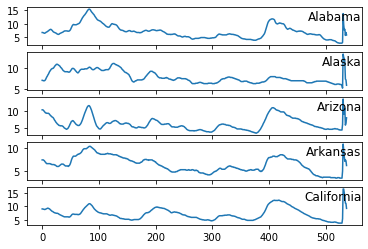

In [16]:
values = rates_df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
plt.pyplot.figure()
for group in groups:
    plt.pyplot.subplot(len(groups), 1, i)
    plt.pyplot.plot(values[:, group])
    plt.pyplot.title(rates_df.columns[group], y=0.5, loc='right')
    i += 1
plt.pyplot.show()

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
values.dtype

dtype('float64')

In [19]:
from sklearn.preprocessing import MinMaxScaler
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_months = 12
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.312500   0.228916   0.683673   0.534247      0.416   0.309278   
2   0.312500   0.228916   0.683673   0.534247      0.416   0.309278   
3   0.304688   0.216867   0.673469   0.534247      0.408   0.298969   
4   0.296875   0.216867   0.653061   0.520548      0.408   0.298969   
5   0.289062   0.216867   0.632653   0.506849      0.400   0.309278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var42(t)  var43(t)  \
1     0.9500   0.364341   0.608696    0.618182  ...  0.094118  0.221311   
2     0.9500   0.364341   0.608696    0.618182  ...  0.082353  0.221311   
3     0.9500   0.364341   0.608696    0.609091  ...  0.082353  0.213115   
4     0.9375   0.387597   0.579710    0.590909  ...  0.070588  0.204918   
5     0.9250   0.418605   0.565217    0.572727  ...  0.070588  0.204918   

   var44(t)  var45(t)  var46(t)  var47(t)  var48(t)  var49(t)  var50(t)  \
1  0.247525    0.4250  0.450704  0.417582     0

In [22]:
drop_columns = range(52, 102)
reframed.drop(reframed.columns[[drop_columns]], axis=1, inplace=True)
print(reframed.head(5))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.312500   0.228916   0.683673   0.534247      0.416   0.309278   
2   0.312500   0.228916   0.683673   0.534247      0.416   0.309278   
3   0.304688   0.216867   0.673469   0.534247      0.408   0.298969   
4   0.296875   0.216867   0.653061   0.520548      0.408   0.298969   
5   0.289062   0.216867   0.632653   0.506849      0.400   0.309278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var43(t-1)  var44(t-1)  \
1     0.9500   0.364341   0.608696    0.618182  ...    0.221311    0.237624   
2     0.9500   0.364341   0.608696    0.618182  ...    0.221311    0.247525   
3     0.9500   0.364341   0.608696    0.609091  ...    0.221311    0.247525   
4     0.9375   0.387597   0.579710    0.590909  ...    0.213115    0.247525   
5     0.9250   0.418605   0.565217    0.572727  ...    0.204918    0.247525   

   var45(t-1)  var46(t-1)  var47(t-1)  var48(t-1)  var49(t-1)  var50(t-1)  \
1      0.4250    0.45

In [25]:
# split into train and test sets
values = reframed.values
n_train_months = 268
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(268, 1, 51) (268,) (269, 1, 51) (269,)


Train on 268 samples, validate on 269 samples
Epoch 1/100
268/268 - 2s - loss: 0.2309 - val_loss: 0.0862
Epoch 2/100
268/268 - 0s - loss: 0.0654 - val_loss: 0.0565
Epoch 3/100
268/268 - 0s - loss: 0.0641 - val_loss: 0.0610
Epoch 4/100
268/268 - 0s - loss: 0.0444 - val_loss: 0.0585
Epoch 5/100
268/268 - 0s - loss: 0.0416 - val_loss: 0.0738
Epoch 6/100
268/268 - 0s - loss: 0.0478 - val_loss: 0.0500
Epoch 7/100
268/268 - 0s - loss: 0.0373 - val_loss: 0.0564
Epoch 8/100
268/268 - 0s - loss: 0.0439 - val_loss: 0.0776
Epoch 9/100
268/268 - 0s - loss: 0.0393 - val_loss: 0.0670
Epoch 10/100
268/268 - 0s - loss: 0.0389 - val_loss: 0.0507
Epoch 11/100
268/268 - 0s - loss: 0.0337 - val_loss: 0.0539
Epoch 12/100
268/268 - 0s - loss: 0.0405 - val_loss: 0.0768
Epoch 13/100
268/268 - 0s - loss: 0.0357 - val_loss: 0.0665
Epoch 14/100
268/268 - 0s - loss: 0.0373 - val_loss: 0.0500
Epoch 15/100
268/268 - 0s - loss: 0.0318 - val_loss: 0.0479
Epoch 16/100
268/268 - 0s - loss: 0.0440 - val_loss: 0.0721
Epo

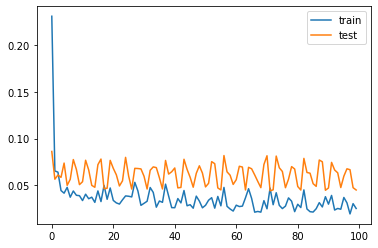

In [32]:
# design network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(51, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.pyplot.plot(history.history['loss'], label='train')
plt.pyplot.plot(history.history['val_loss'], label='test')
plt.pyplot.legend()
plt.pyplot.show()

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# make a prediction
test_X = test_X.reshape(269, 1, 51)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.997


C:\Users\rielst.amand\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


t+1 RMSE: 3.273229
t+2 RMSE: 6.370793
t+3 RMSE: 9.324156
t+4 RMSE: 12.690460
t+5 RMSE: 15.671001
t+6 RMSE: 18.789888


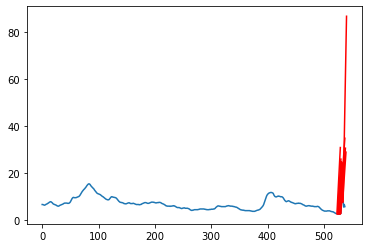

In [73]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(raw_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # fit network
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag], test[i, n_lag:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
    # plot the entire dataset in blue
    pyplot.plot(series.values)
    # plot the forecasts in red
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        pyplot.plot(xaxis, yaxis, color='red')
    # show the plot
    pyplot.show()

# load dataset
series = read_csv('ue_final.csv', header=0, index_col=0, squeeze=True, parse_dates=[0])
series = pd.DataFrame(series["Alabama"])
# configure
n_lag = 2
n_seq = 6
n_test = 6
n_epochs = 200
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [67]:
series = pd.read_csv('ue_final.csv', header=0, index_col=0, squeeze=True, parse_dates=[0])
series = pd.DataFrame(series["Alabama"])
series.shape

(538, 1)

t+1 RMSE: 0.990823
t+2 RMSE: 1.859602
t+3 RMSE: 2.512603
t+4 RMSE: 3.055932
t+5 RMSE: 3.393830
t+6 RMSE: 3.729047
t+7 RMSE: 3.963103
t+8 RMSE: 4.097111
t+9 RMSE: 4.131770
t+10 RMSE: 4.067827
t+11 RMSE: 3.905797
t+12 RMSE: 3.646326
t+13 RMSE: 3.489837
t+14 RMSE: 3.336638
t+15 RMSE: 3.286851
t+16 RMSE: 3.240462
t+17 RMSE: 3.197258
t+18 RMSE: 3.257178
t+19 RMSE: 3.219933
t+20 RMSE: 3.185650
t+21 RMSE: 3.154394
t+22 RMSE: 3.026227
t+23 RMSE: 2.801344
t+24 RMSE: 2.479862
t+25 RMSE: 1.961942
t+26 RMSE: 1.347711
t+27 RMSE: 0.637331
t+28 RMSE: 0.169059
t+29 RMSE: 1.171160
t+30 RMSE: 2.268387
t+31 RMSE: 3.460187
t+32 RMSE: 4.646086
t+33 RMSE: 5.725822
t+34 RMSE: 6.799355
t+35 RMSE: 7.766581
t+36 RMSE: 8.727607
t+37 RMSE: 9.682399
t+38 RMSE: 10.730803
t+39 RMSE: 11.772581
t+40 RMSE: 12.907559
t+41 RMSE: 14.035539
t+42 RMSE: 15.156432
t+43 RMSE: 16.270184
t+44 RMSE: 17.476803
t+45 RMSE: 18.676269
t+46 RMSE: 19.968620
t+47 RMSE: 21.253751
t+48 RMSE: 22.531617
t+49 RMSE: 23.802035
t+50 RMSE: 25.064

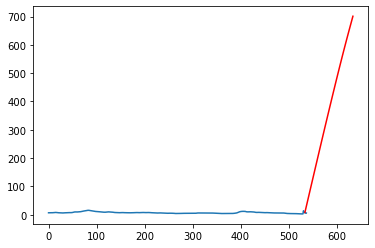

In [88]:
# configure
n_lag = 2
n_seq = 100
n_test = 1
n_epochs = 200
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [155]:
# Multi variate and multi step
m_series = pd.read_csv("ue_final.csv", index_col=0)
# For this case, let's assume that
# Given past 12 months observation, forecast the next 3 months observations. 
n_past = 12
n_future = 6 
n_features = 51

# train test split
train_df, test_df = m_series[0:403], m_series[403:]  # 75% and 25%
train_df.shape, test_df.shape

((403, 51), (135, 51))

In [156]:
# Scale values
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\rielst.amand\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rielst.amand\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rielst.amand\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A v

In [157]:
def split_series(series, n_past, n_future):
    #
    # n_past ==> no of past observations
    #
    # n_future ==> no of future observations 
    #
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [158]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [159]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)
#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

In [160]:
model_e1d1.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 12, 51)]     0                                            
__________________________________________________________________________________________________
lstm_23 (LSTM)                  [(None, 100), (None, 60800       input_7[0][0]                    
__________________________________________________________________________________________________
repeat_vector_6 (RepeatVector)  (None, 6, 100)       0           lstm_23[0][0]                    
__________________________________________________________________________________________________
lstm_24 (LSTM)                  (None, 6, 100)       80400       repeat_vector_6[0][0]            
                                                                 lstm_23[0][1]              

In [161]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train, 
                            y_train, 
                            epochs=100, 
                            validation_data=(X_test,y_test), 
                            batch_size=10, 
                            verbose=0, 
                            callbacks=[reduce_lr])


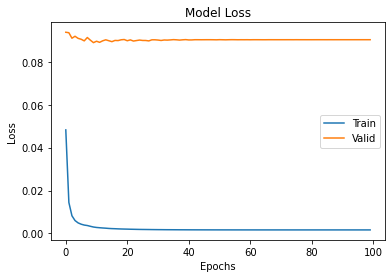

In [162]:
plt.pyplot.plot(history_e1d1.history['loss'])
plt.pyplot.plot(history_e1d1.history['val_loss'])
plt.pyplot.title("Model Loss")
plt.pyplot.xlabel('Epochs')
plt.pyplot.ylabel('Loss')
plt.pyplot.legend(['Train', 'Valid'])
plt.pyplot.show()

In [163]:
pred1_e1d1=model_e1d1.predict(X_test)
pred_e1d1=model_e1d1.predict(X_train)
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
for index, i in enumerate(train_df.columns):
    print(i)
    for j in range(1,7):
        print("Month",j, "MSE: ", mean_squared_error(y_test[:,j-1,index], pred1_e1d1[:,j-1,index]))
    print()

Alabama
Month 1 MSE:  3.2291361494023123
Month 2 MSE:  3.973212349274153
Month 3 MSE:  4.365609791593594
Month 4 MSE:  4.702110572273875
Month 5 MSE:  4.806472993007296
Month 6 MSE:  5.000338484541907

Alaska
Month 1 MSE:  2.0359277457081864
Month 2 MSE:  2.0244213599801753
Month 3 MSE:  2.077646358916727
Month 4 MSE:  2.0726581267446966
Month 5 MSE:  2.0054680523255564
Month 6 MSE:  1.9937340822147527

Arizona
Month 1 MSE:  0.8150309471284258
Month 2 MSE:  1.0291716594048554
Month 3 MSE:  1.456924180306998
Month 4 MSE:  2.0528020529757045
Month 5 MSE:  2.34609547746727
Month 6 MSE:  2.621212346308961

Arkansas
Month 1 MSE:  1.408120070182585
Month 2 MSE:  1.5213893126373115
Month 3 MSE:  1.577107130803461
Month 4 MSE:  1.6175189688240794
Month 5 MSE:  1.6921655034214214
Month 6 MSE:  1.79933192010492

California
Month 1 MSE:  2.6896320534052234
Month 2 MSE:  3.7126345902744498
Month 3 MSE:  4.634855544571629
Month 4 MSE:  5.344560067372678
Month 5 MSE:  5.9718509511961
Month 6 MSE:  6

Month 2 MSE:  1.9502176741595036
Month 3 MSE:  2.389701267793417
Month 4 MSE:  2.8725367537211413
Month 5 MSE:  3.3055953454071276
Month 6 MSE:  3.7341019824145407

South Dakota
Month 1 MSE:  0.8636450525036872
Month 2 MSE:  1.0894070289493465
Month 3 MSE:  1.227775141270376
Month 4 MSE:  1.313576670018849
Month 5 MSE:  1.3582834300363635
Month 6 MSE:  1.3878619360063313

Tennessee
Month 1 MSE:  1.7500112666908811
Month 2 MSE:  2.273753389941195
Month 3 MSE:  2.7374255755115717
Month 4 MSE:  3.1868670361662996
Month 5 MSE:  3.58174013917189
Month 6 MSE:  3.7756420675192657

Texas
Month 1 MSE:  1.7576966105707956
Month 2 MSE:  2.119194878028164
Month 3 MSE:  2.3345762989609105
Month 4 MSE:  2.5477528114280057
Month 5 MSE:  2.7448811921088514
Month 6 MSE:  2.9770038050524916

Utah
Month 1 MSE:  0.7636627735279001
Month 2 MSE:  1.2638615418150418
Month 3 MSE:  1.5146016577603594
Month 4 MSE:  1.6664635868091644
Month 5 MSE:  1.7198859106880529
Month 6 MSE:  1.842468483217493

Vermont
Mont

In [220]:
mse_means = []
for index, i in enumerate(train_df.columns):
    mse_list = []
    for j in range(1, 7):
        mse_list.append(mean_squared_error(y_test[:,j-1,index], pred1_e1d1[:,j-1,index]))
    mse_means.append(np.array(mse_list).mean())
    print(i, ":", np.array(mse_list).mean())

print(mse_means)

Alabama : 4.346146723348856
Alaska : 2.0349759543150157
Arizona : 1.7202061105987025
Arkansas : 1.602605484328963
California : 4.8102783550088475
Colorado : 2.3079323922605854
Connecticut : 2.689480006462334
Delaware : 3.3891089777707113
District of Columbia : 0.6728934746020139
Florida : 3.014351935428078
Georgia : 1.7215688531747813
Hawaii : 9.923337031548524
Idaho : 2.3113997278684386
Illinois : 3.8297917063484834
Indiana : 3.1099979309977024
Iowa : 1.6927784206048073
Kansas : 1.3503297006862185
Kentucky : 2.223437412848257
Louisiana : 2.5369723588390873
Maine : 1.9021906954199734
Maryland : 1.0763776369666458
Massachusetts : 6.048659694915972
Michigan : 9.39596091155474
Minnesota : 2.080017705518745
Mississippi : 1.858492223537936
Missouri : 2.0079842184613583
Montana : 1.1980364361289613
Nebraska : 0.5402116961070579
Nevada : 13.129087758604115
New Hampshire : 4.266250956206879
New Jersey : 4.463321206681203
New Mexico : 1.641733411896465
New York : 4.454965990411927
North Carolin

In [195]:
X_forecast = m_series[526:]
X_forecast = X_forecast.values.reshape(1, 12, 51)
X_forecast.shape

(1, 12, 51)

In [234]:
forecasts = model_e1d1.predict(X_forecast)
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    forecasts[:,:,index]=scaler.inverse_transform(forecasts[:,:,index])
    
state_data_dict = {}
for index, i in enumerate(train_df.columns):
    data_dict = {"Mean Squared Error": mse_means[index],
                "Forecasts": {}}
    print(i, "- Mean Squared Error:", mse_means[index])
    for j in range(1, 7):
        data_dict["Forecasts"][f"Month {j}"] = forecasts[:, j-1, index][0]
        print("Month", j, "Forecast:", forecasts[:, j-1, index][0])
    state_data_dict[i] = data_dict
    print()

Alabama - Mean Squared Error: 4.346146723348856
Month 1 Forecast: 9.409434
Month 2 Forecast: 9.417472
Month 3 Forecast: 9.456916
Month 4 Forecast: 9.475317
Month 5 Forecast: 9.467121
Month 6 Forecast: 9.448823

Alaska - Mean Squared Error: 2.0349759543150157
Month 1 Forecast: 8.806972
Month 2 Forecast: 8.83794
Month 3 Forecast: 8.849095
Month 4 Forecast: 8.851331
Month 5 Forecast: 8.846501
Month 6 Forecast: 8.836965

Arizona - Mean Squared Error: 1.7202061105987025
Month 1 Forecast: 10.308601
Month 2 Forecast: 9.855669
Month 3 Forecast: 9.354225
Month 4 Forecast: 8.8775625
Month 5 Forecast: 8.463921
Month 6 Forecast: 8.122739

Arkansas - Mean Squared Error: 1.602605484328963
Month 1 Forecast: 7.8199124
Month 2 Forecast: 7.6985145
Month 3 Forecast: 7.5931373
Month 4 Forecast: 7.51089
Month 5 Forecast: 7.4500923
Month 6 Forecast: 7.4018936

California - Mean Squared Error: 4.8102783550088475
Month 1 Forecast: 7.8524213
Month 2 Forecast: 8.317772
Month 3 Forecast: 8.59709
Month 4 Forecast

In [235]:
import pprint
pprint.pprint(state_data_dict)

{'Alabama': {'Forecasts': {'Month 1': 9.409434,
                           'Month 2': 9.417472,
                           'Month 3': 9.456916,
                           'Month 4': 9.475317,
                           'Month 5': 9.467121,
                           'Month 6': 9.448823},
             'Mean Squared Error': 4.346146723348856},
 'Alaska': {'Forecasts': {'Month 1': 8.806972,
                          'Month 2': 8.83794,
                          'Month 3': 8.849095,
                          'Month 4': 8.851331,
                          'Month 5': 8.846501,
                          'Month 6': 8.836965},
            'Mean Squared Error': 2.0349759543150157},
 'Arizona': {'Forecasts': {'Month 1': 10.308601,
                           'Month 2': 9.855669,
                           'Month 3': 9.354225,
                           'Month 4': 8.8775625,
                           'Month 5': 8.463921,
                           'Month 6': 8.122739},
             'Mean Squared E

In [236]:
import matplotlib.pyplot as plt

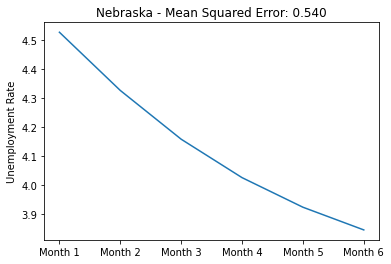

In [273]:
plt.plot(state_data_dict["Nebraska"]["Forecasts"].keys(), state_data_dict["Nebraska"]["Forecasts"].values())
mse = state_data_dict["Nebraska"]["Mean Squared Error"]
plt.title(f"Nebraska - Mean Squared Error: %.3f" % mse)
plt.ylabel("Unemployment Rate")
plt.show()

In [274]:
month1_list = []
month2_list = []
month3_list = []
month4_list = []
month5_list = []
month6_list = []
for index, i in enumerate(train_df.columns):
    month1_list.append(forecasts[:, 0, index][0])
    month2_list.append(forecasts[:, 1, index][0])
    month3_list.append(forecasts[:, 2, index][0])
    month4_list.append(forecasts[:, 3, index][0])
    month5_list.append(forecasts[:, 4, index][0])
    month6_list.append(forecasts[:, 5, index][0])
month1_list

[9.409434,
 8.806972,
 10.308601,
 7.8199124,
 7.8524213,
 6.4128885,
 6.864484,
 6.8228984,
 8.669409,
 7.9863496,
 6.885092,
 7.6014814,
 6.270958,
 9.569767,
 6.8146305,
 5.4114995,
 5.2202115,
 7.7119985,
 8.367423,
 7.1038046,
 5.9584,
 7.451895,
 8.258518,
 6.1348333,
 8.646203,
 7.6656704,
 6.5354896,
 4.5257206,
 8.066609,
 6.2364073,
 7.7657003,
 7.9183493,
 8.489266,
 7.3646884,
 4.9754024,
 9.389672,
 6.194974,
 7.912242,
 8.833888,
 8.635823,
 9.383011,
 3.966318,
 7.6700015,
 6.08701,
 7.106016,
 7.320072,
 5.945113,
 9.259526,
 9.962596,
 7.3300557,
 5.997353]

In [275]:
map_df = pd.DataFrame()
map_df["State"] = train_df.columns.to_list()
map_df["MSE"] = mse_means
map_df["Month 1"] = month1_list
map_df["Month 2"] = month2_list
map_df["Month 3"] = month3_list
map_df["Month 4"] = month4_list
map_df["Month 5"] = month5_list
map_df["Month 6"] = month6_list
map_df.head(5)

,State,MSE,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6
0,Alabama,4.346147,9.409434,9.417472,9.456916,9.475317,9.467121,9.448823
1,Alaska,2.034976,8.806972,8.837940,8.849095,8.851331,8.846501,8.836965
2,Arizona,1.720206,10.308601,9.855669,9.354225,8.877563,8.463921,8.122739
3,Arkansas,1.602605,7.819912,7.698514,7.593137,7.510890,7.450092,7.401894
4,California,4.810278,7.852421,8.317772,8.597090,8.712965,8.712329,8.642013


In [280]:
map_df.index = map_df["State"]
map_df = map_df.drop("State", axis=1)

In [286]:
df = pd.read_csv("unemployment_data.csv")
fips_codes = {}
for i in range(0, 54):
    if (df.loc[i]["State and area"] != "New York city" and df.loc[i]["State and area"] != "Los Angeles County"):
        fips_codes[df.loc[i]["State and area"]] = df.loc[i]["FIPS Code"]
        
fips_codes 

{'Alabama': 1,
 'Alaska': 2,
 'Arizona': 4,
 'Arkansas': 5,
 'California': 6,
 'Colorado': 8,
 'Connecticut': 9,
 'Delaware': 10,
 'District of Columbia': 11,
 'Florida': 12,
 'Georgia': 13,
 'Hawaii': 15,
 'Idaho': 16,
 'Illinois': 17,
 'Indiana': 18,
 'Iowa': 19,
 'Kansas': 20,
 'Kentucky': 21,
 'Louisiana': 22,
 'Maine': 23,
 'Maryland': 24,
 'Massachusetts': 25,
 'Michigan': 26,
 'Minnesota': 27,
 'Mississippi': 28,
 'Missouri': 29,
 'Montana': 30,
 'Nebraska': 31,
 'Nevada': 32,
 'New Hampshire': 33,
 'New Jersey': 34,
 'New Mexico': 35,
 'New York': 36,
 'North Carolina': 37,
 'North Dakota': 38,
 'Ohio': 39,
 'Oklahoma': 40,
 'Oregon': 41,
 'Pennsylvania': 42,
 'Rhode Island': 44,
 'South Carolina': 45,
 'South Dakota': 46,
 'Tennessee': 47,
 'Texas': 48,
 'Utah': 49,
 'Vermont': 50,
 'Virginia': 51,
 'Washington': 53,
 'West Virginia': 54,
 'Wisconsin': 55,
 'Wyoming': 56}

In [288]:
map_df["FIPS Code"] = fips_codes.values()
map_df

,MSE,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,FIPS Code
State,,,,,,,,
Alabama,4.346147,9.409434,9.417472,9.456916,9.475317,9.467121,9.448823,1
Alaska,2.034976,8.806972,8.837940,8.849095,8.851331,8.846501,8.836965,2
Arizona,1.720206,10.308601,9.855669,9.354225,8.877563,8.463921,8.122739,4
Arkansas,1.602605,7.819912,7.698514,7.593137,7.510890,7.450092,7.401894,5
California,4.810278,7.852421,8.317772,8.597090,8.712965,8.712329,8.642013,6
Colorado,2.307932,6.412889,6.402399,6.368693,6.318026,6.261919,6.211564,8
Connecticut,2.689480,6.864484,6.743565,6.666715,6.603661,6.546451,6.494006,9
Delaware,3.389109,6.822898,6.852336,6.849674,6.809372,6.740660,6.657509,10
District of Columbia,0.672893,8.669409,8.815008,8.892154,8.940295,8.982369,9.022967,11


In [289]:
map_df.to_csv("map_data.csv")

In [283]:
import plotly.graph_objects as go

In [294]:
map_df = pd.read_csv("map_data_fix.csv")
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
map_df["State Code"] = df["code"]
map_df

,State,MSE,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,FIPS Code,Change,State Code
0,Alabama,4.346147,9.409434,9.417472,9.456916,9.475317,9.467121,9.448823,1,0.039389,AL
1,Alaska,2.034976,8.806972,8.837940,8.849095,8.851331,8.846501,8.836965,2,0.029993,AK
2,Arizona,1.720206,10.308601,9.855669,9.354225,8.877563,8.463921,8.122739,4,-2.185863,AZ
3,Arkansas,1.602605,7.819912,7.698514,7.593137,7.510890,7.450092,7.401894,5,-0.418019,AR
4,California,4.810278,7.852421,8.317772,8.597090,8.712965,8.712329,8.642013,6,0.789591,CA
5,Colorado,2.307932,6.412889,6.402399,6.368693,6.318026,6.261919,6.211564,8,-0.201325,CO
6,Connecticut,2.689480,6.864484,6.743565,6.666715,6.603661,6.546451,6.494006,9,-0.370478,CT
7,Delaware,3.389109,6.822898,6.852336,6.849674,6.809372,6.740660,6.657509,10,-0.165390,DE
8,Florida,3.014352,7.986350,7.886281,7.791058,7.675232,7.544950,7.413892,12,-0.572458,FL
9,Georgia,1.721569,6.885092,7.113213,7.211459,7.219677,7.179672,7.120280,13,0.235188,GA


In [295]:
map_df.to_csv("map_data_final.csv")

In [347]:
df = pd.read_csv("map_data_final.csv")
for col in df.columns:
    df[col] = df[col].astype(str)

for i in range(0, 50):
    df.loc[i, ("MSE")] = df.loc[i, ("MSE")][0:5]
    df.loc[i, ("Month 1")] = df.loc[i, ("Month 1")][0:5]
    df.loc[i, ("Month 2")] = df.loc[i, ("Month 2")][0:5]
    df.loc[i, ("Month 3")] = df.loc[i, ("Month 3")][0:5]
    df.loc[i, ("Month 4")] = df.loc[i, ("Month 4")][0:5]
    df.loc[i, ("Month 5")] = df.loc[i, ("Month 5")][0:5]
    df.loc[i, ("Month 6")] = df.loc[i, ("Month 6")][0:5]
    
df['text'] = df['State'] + '<br>' + \
    'Mean Square Error: ' + df['MSE'] + '<br>' + 'Month 1: ' + df['Month 1'] + '<br>' + \
    'Month 2: ' + df['Month 2'] + '<br>' + 'Month 3: ' + df['Month 3'] + '<br>' + \
    'Month 4: ' + df['Month 4'] + '<br>' + 'Month 5: ' + df['Month 5'] + '<br>' + 'Month 6: ' + df['Month 6']

In [349]:
fig = go.Figure(data=go.Choropleth(
    locations=df["State Code"],
    z = round(df["Change"].astype(float), 4),
    text=df["text"],
    locationmode="USA-states",
    colorscale="Blues",
    colorbar_title="Forecasted 6 Month Unemployment Change",
))

fig.update_layout(
    title_text="October 2020 6 Month Forecasted Change in Unemployment Rate by State",
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(120, 174, 255)'),
)

fig.show()

In [333]:
df.loc[0]["Month 1"][0:5]

'9.409'